<a href="https://colab.research.google.com/github/ChoiJMS2/Colab_Study/blob/main/4%EC%9B%94%20%EA%B3%B5%EB%B6%80/20230418.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd

DATA_PATH = ('/content/drive/MyDrive/2023_Yonsei_IT/kaggle/house-prices-advanced-regression-techniques/')
train = pd.read_csv(DATA_PATH + 'train.csv')
test = pd.read_csv(DATA_PATH + 'test.csv')

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train.info() # 데이터 타입 / 컬럼명 확인 / 결측치 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

## 문제 확인
 - 훈련데이터 / 테스트 데이터

 ### Feature Engineering
 - 데이터 전처리 코드 작성

### 이상치 제거
 - 이상치 : 극단값, 평균으로부터 벗어난 값
 - 이상한 값 : 상식에 부합하지 않는 값
 - 인사쪽 데이터
  + 공공기관 KPI : 예산절감 / 동인한 효과
  + 급여 예측
  + 이상치 : 급여가 0원/음수 인 데이터

In [14]:
train.shape

(1460, 81)

In [19]:
train[(train['OverallQual'] < 4) & (train['SalePrice'] > 100000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
74,75,50,RM,60.0,5790,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,107400
323,324,20,RM,49.0,5820,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,126175
449,450,50,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,120000
1045,1046,20,RL,NaN,13680,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,139600
1404,1405,50,RL,60.0,10410,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2006,WD,Family,105000


In [23]:
train = train.reset_index(drop = True)
train = train.drop(train[(train['OverallQual'] < 4) & (train['SalePrice'] > 100000)].index, axis = 0)
train.shape

(1455, 81)

In [24]:
train = train.reset_index(drop = True)
train.shape

(1455, 81)

## 종속변수의 분포 파악
- 수치 데이터 시각화 (연속형)
  + 히스토그램

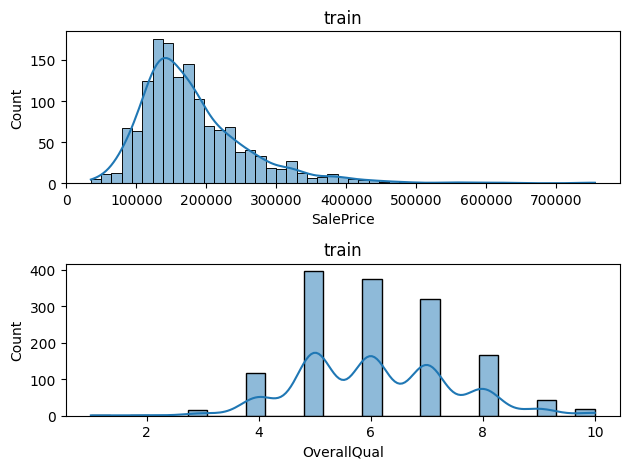

In [42]:
# Seaborn 시각화 그래프 : 히스토그램
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows = 2, ncols = 1)
sns.histplot(x = 'SalePrice', data = train, kde = True, ax=ax[0])
ax[0].set_title("train")

sns.histplot(x = 'OverallQual', data = train, kde = True, ax=ax[1])
ax[1].set_title("train")

plt.tight_layout()
plt.show()

In [45]:
from scipy.stats import norm
(mu, sigma) = norm.fit(train['SalePrice'])
print(mu, sigma)

181131.80137457044 79466.69935176395


https://dschloe.github.io/python/2023/02/matplotlib_koreanfont/

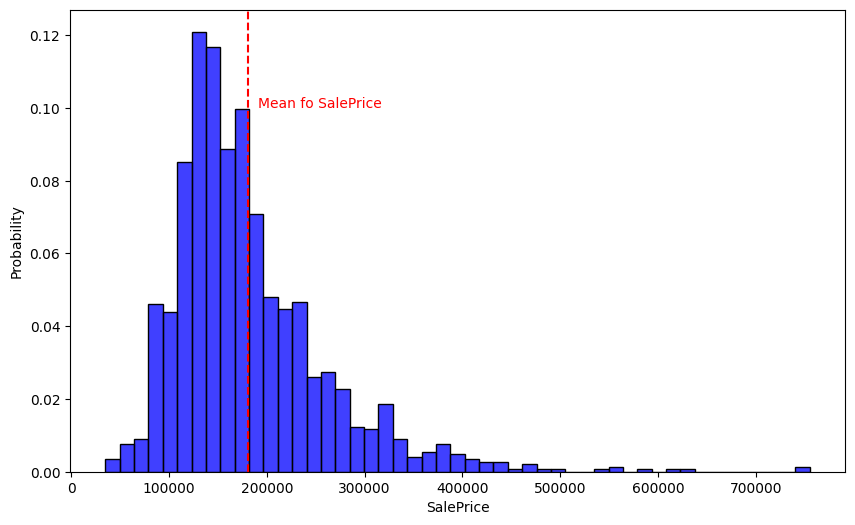

In [48]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.histplot(train['SalePrice'], color = 'b', stat = 'probability')
ax.axvline(mu, color = 'r', linestyle = '--')
ax.text(mu + 10000, 0.10, 'Mean fo SalePrice', color = 'r')
plt.show()

12.025216848544066 0.3994595223123619


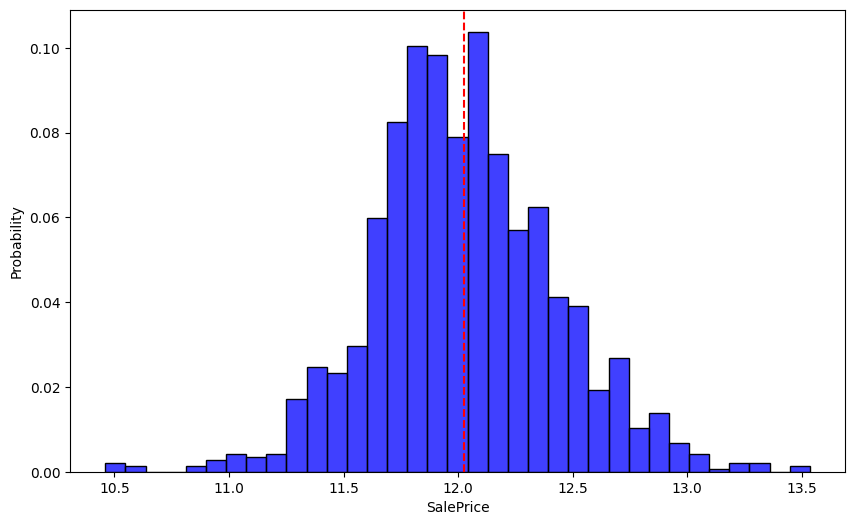

In [49]:
# 로그변환
import numpy as np

train['SalePrice'] = np.log1p(train['SalePrice'])

(mu, sigma) = norm.fit(train['SalePrice'])
print(mu, sigma)

fig, ax = plt.subplots(figsize = (10, 6))
sns.histplot(train['SalePrice'], color = 'b', stat = 'probability')
ax.axvline(mu, color = 'r', linestyle = '--')
# ax.text(mu + 1, 0.10, 'Mean fo SalePrice', color = 'r')
plt.show()

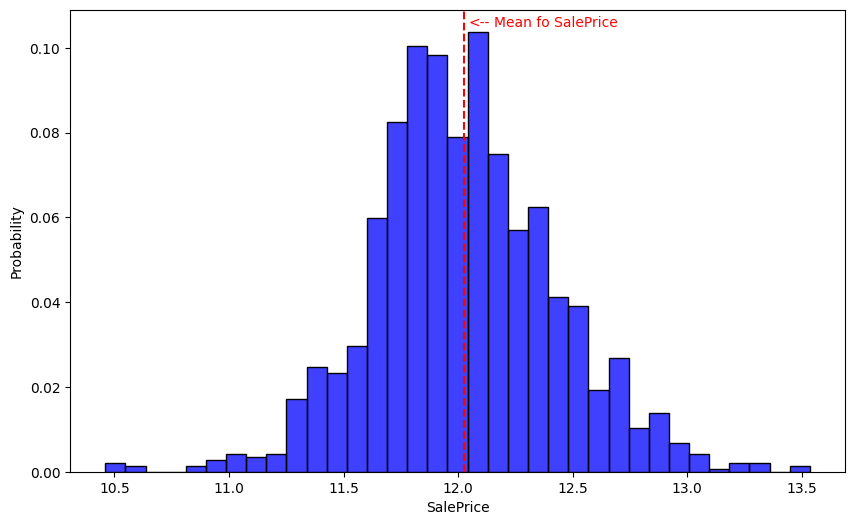

In [61]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.histplot(train['SalePrice'], color = 'b', stat = 'probability')
ax.axvline(mu, color = 'r', linestyle = '--')
ax.text(mu + 0.13, 0.105, 'Mean fo SalePrice', color = 'r')
ax.text(mu + 0.02, 0.105, '<--', color = 'r')
plt.show()

## 불필요한 데이터 제거
- ID값 제거
  + ID를 제거하는 이유 : ID는 Primary키, 딥러닝은 예측, 대략 평균을 잡고 예측하는데 ID는 정보와 상관이없다. 중복값이 없음. 즉, 패턴이 없음.

In [63]:
# 혹시 몰라 빼서 저장하기
train_ID = train['Id']
test_ID = test['Id']

train = train.drop(['Id'], axis = 1)
test = test.drop(['Id'], axis = 1)

train.shape, test.shape


((1455, 80), (1459, 79))

### Y값 추출
- y값에 해당하는 salePrice 추출

In [65]:
y = train['SalePrice']
y[:5]

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [67]:
train = train.drop('SalePrice', axis = 1)
train.shape, test.shape, y.shape

((1455, 79), (1459, 79), (1455,))

### 데이터 합치기
- 둘다 동일하게 처리할 것이다!
  + 이 방법을 쓰면, Data Leakage에 빠질 확률이 높음 (왜?!!)
- 데이터 분석 희망자 : Data Leakage(블로그로 정리하기)
- 데이터 가공 및 Feature Engineering 진행 시, 평균 대체 등을 진행할 때에는, 원칙적으로 train / test 별도로 분리해야함
- Data Leakage를 피하는 방법 : scikit-learn pipeline을 공부할것 (블로그 정리)
- Data Leakage 간단정리 : concat 사용, concat 사용시 열의 개수는 같아야함

In [68]:
all_df = pd.concat([train, test]).reset_index(drop = True)
all_df.shape                                             

(2914, 79)

### 결측치 확인
- 결측치의 비율을 확인하는 사용자 정의 함수를 만듦

In [69]:
def check_na(data, head_num = 6):
  isnull_na = (data.isnull().sum() / len(data)) * 100
  data_na = isnull_na.drop(isnull_na[isnull_na == 0].index).sort_values(ascending=False)
  missing_data = pd.DataFrame({'Missing Ratio' :data_na, 
                               'Data Type': data.dtypes[data_na.index]})
  print("결측치 데이터 컬럼과 건수:\n", missing_data.head(head_num))

check_na(all_df, 20)

결측치 데이터 컬럼과 건수:
               Missing Ratio Data Type
PoolQC            99.656829    object
MiscFeature       96.396706    object
Alley             93.239533    object
Fence             80.439259    object
FireplaceQu       48.592999    object
LotFrontage       16.643789   float64
GarageFinish       5.456417    object
GarageQual         5.456417    object
GarageCond         5.456417    object
GarageYrBlt        5.456417   float64
GarageType         5.387783    object
BsmtExposure       2.779684    object
BsmtCond           2.779684    object
BsmtQual           2.745367    object
BsmtFinType2       2.711050    object
BsmtFinType1       2.676733    object
MasVnrType         0.823610    object
MasVnrArea         0.789293   float64
MSZoning           0.137268    object
BsmtFullBath       0.068634   float64


## EDA : 탐색적 자료분석
- 시각화 코드를 다 쳐서, 무엇을 / 어떻게 처리할지, 판단하는 과정

In [74]:
all_df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'], axis=1, inplace=True)
check_na(all_df)

결측치 데이터 컬럼과 건수:
               Missing Ratio Data Type
GarageCond         5.456417    object
GarageQual         5.456417    object
GarageYrBlt        5.456417   float64
GarageFinish       5.456417    object
GarageType         5.387783    object
BsmtCond           2.779684    object


### 결측치 채우기
- 문자 데이터(object)를 채우는 방법
  + 가장 빈도가 높은 데이터 순 대치
- 수치 데이터(int, float)를 채우는 방법
  + 평균, 중간값

In [75]:
all_df['BsmtCond'].value_counts()


TA    2602
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64

In [76]:
all_df['BsmtCond'].mode()[0]

0    TA
Name: BsmtCond, dtype: object

In [79]:
check_na(all_df, 30)

결측치 데이터 컬럼과 건수:
               Missing Ratio Data Type
GarageCond         5.456417    object
GarageQual         5.456417    object
GarageYrBlt        5.456417   float64
GarageFinish       5.456417    object
GarageType         5.387783    object
BsmtCond           2.779684    object
BsmtExposure       2.779684    object
BsmtQual           2.745367    object
BsmtFinType2       2.711050    object
BsmtFinType1       2.676733    object
MasVnrType         0.823610    object
MasVnrArea         0.789293   float64
MSZoning           0.137268    object
Functional         0.068634    object
Utilities          0.068634    object
BsmtFullBath       0.068634   float64
BsmtHalfBath       0.068634   float64
GarageArea         0.034317   float64
GarageCars         0.034317   float64
TotalBsmtSF        0.034317   float64
KitchenQual        0.034317    object
Electrical         0.034317    object
BsmtUnfSF          0.034317   float64
BsmtFinSF2         0.034317   float64
BsmtFinSF1         0.034317   flo

In [80]:
# object 컬럼만 추출
# 반복문 코드를 짠다
# 힌트
all_df['BsmtCond'] = all_df['BsmtCond'].mode()[0]

In [93]:
# object 컬럼만 추출
hw = all_df.select_dtypes(include = ["object"])
hw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2914 entries, 0 to 2913
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       2910 non-null   object
 1   Street         2914 non-null   object
 2   LotShape       2914 non-null   object
 3   LandContour    2914 non-null   object
 4   Utilities      2912 non-null   object
 5   LotConfig      2914 non-null   object
 6   LandSlope      2914 non-null   object
 7   Neighborhood   2914 non-null   object
 8   Condition1     2914 non-null   object
 9   Condition2     2914 non-null   object
 10  BldgType       2914 non-null   object
 11  HouseStyle     2914 non-null   object
 12  RoofStyle      2914 non-null   object
 13  RoofMatl       2914 non-null   object
 14  Exterior1st    2913 non-null   object
 15  Exterior2nd    2913 non-null   object
 16  MasVnrType     2890 non-null   object
 17  ExterQual      2914 non-null   object
 18  ExterCond      2914 non-null

In [100]:
 hw['SaleCondition'].value_counts()

Normal     2398
Partial     245
Abnorml     190
Family       45
Alloca       24
AdjLand      12
Name: SaleCondition, dtype: int64

In [101]:
 hw['SaleCondition'].mode()[0]

'Normal'

In [104]:
# 반복문
for i in hw:
  all = hw[i].mode()[0]
print(all)

Normal
